In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

First few rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



Distribution of Iris species:


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


Pairplot of features:


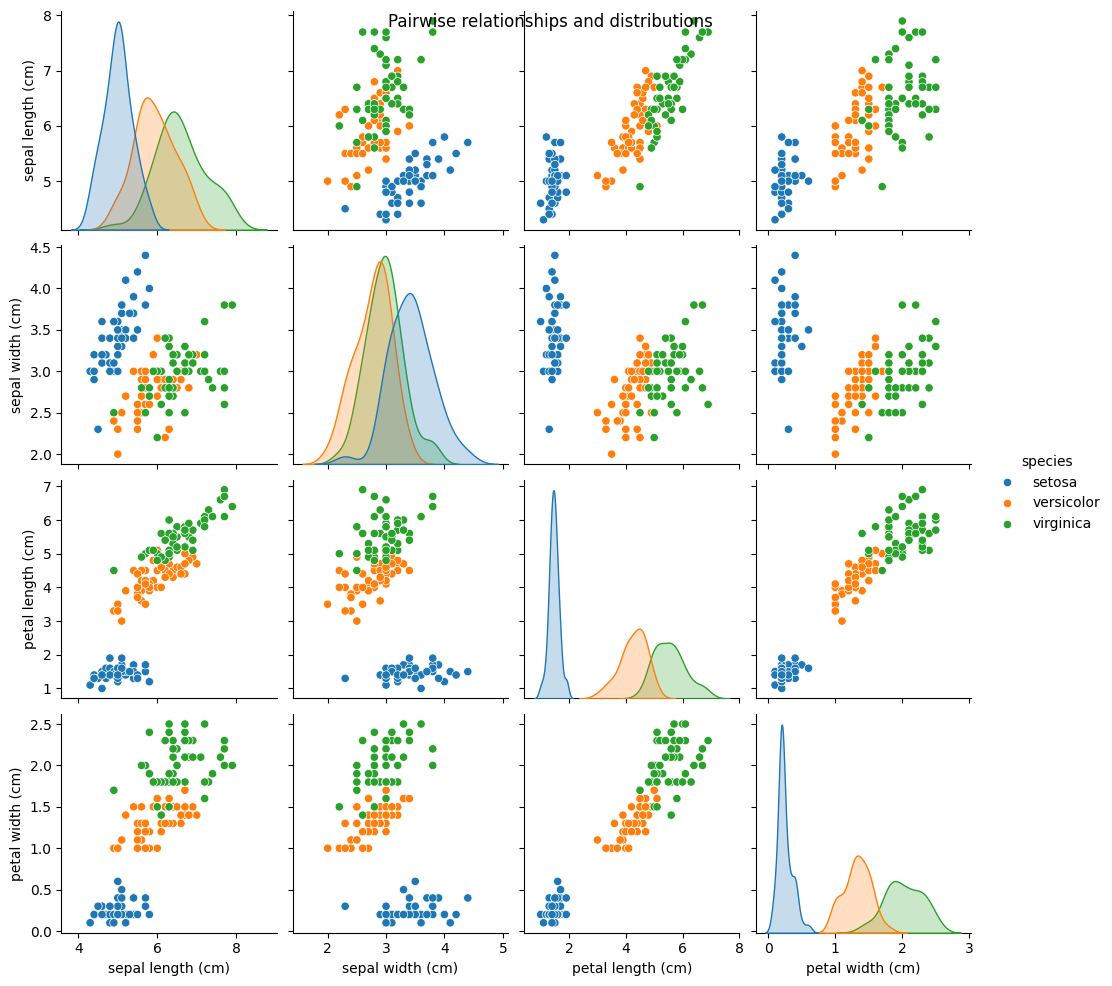


Boxplot of features by species:


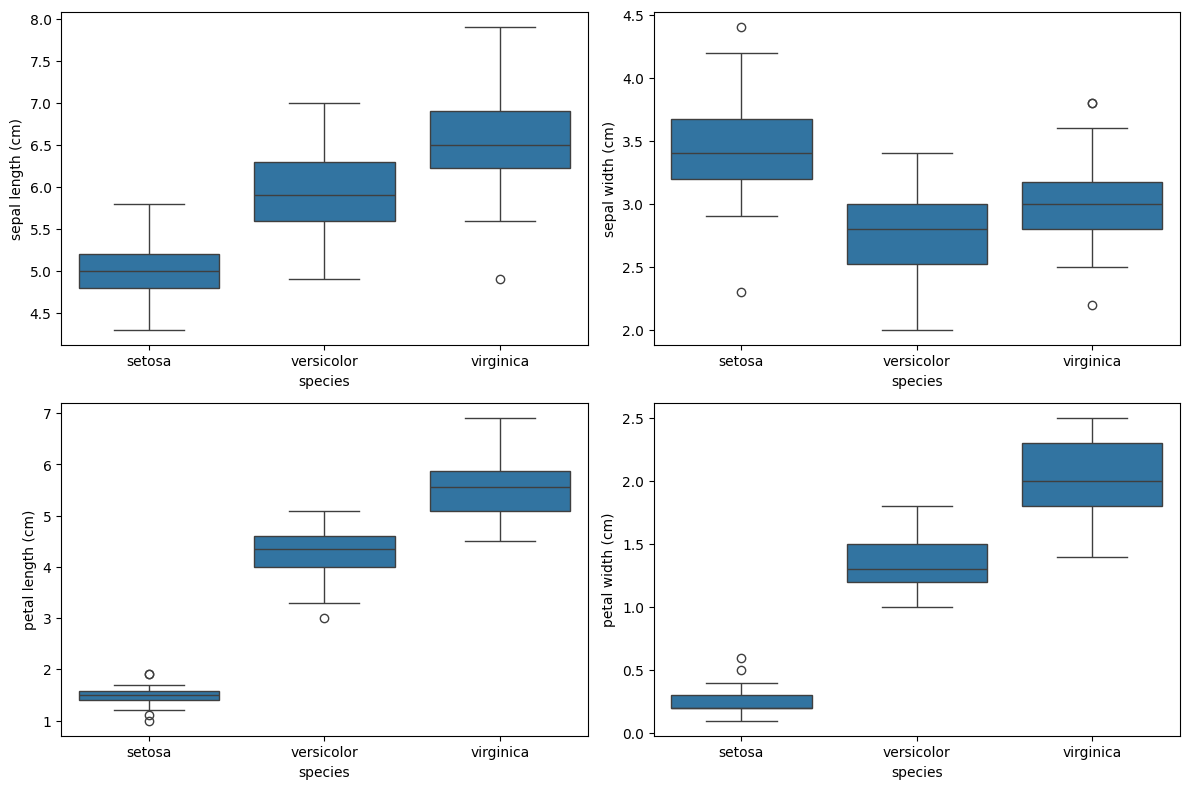

In [2]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Convert to DataFrame for easier manipulation
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['species'] = iris.target_names[y]

# Exploratory Data Analysis (EDA)

# Display first few rows of the dataset
print("First few rows of the dataset:")
display(iris_df.head())

# Distribution of species
species_count = iris_df['species'].value_counts()
print("\nDistribution of Iris species:")
display(species_count)

# Pairplot to visualize relationships between features
print("\nPairplot of features:")
sns.pairplot(iris_df, hue='species', diag_kind='kde')
plt.suptitle('Pairwise relationships and distributions')
plt.show()

# Boxplot to see the distribution of features across different species
print("\nBoxplot of features by species:")
plt.figure(figsize=(12, 8)) # Create a figure before plotting
plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='sepal length (cm)', data=iris_df)
plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='sepal width (cm)', data=iris_df)
plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='petal length (cm)', data=iris_df)
plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='petal width (cm)', data=iris_df)
plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

In [3]:
# Preprocess the data

# No missing values to handle in this dataset

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(report)


Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [4]:
# Feature Importance Analysis
# I'm analyzing which features my decision tree considers most important for classification
feature_importance = model.feature_importances_
feature_names = iris.feature_names

# I'm creating a DataFrame to better organize and display feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("\nFeature Importance Ranking:")
print(importance_df)


Feature Importance Ranking:
             Feature  Importance
2  petal length (cm)    0.906143
3   petal width (cm)    0.077186
1   sepal width (cm)    0.016670
0  sepal length (cm)    0.000000


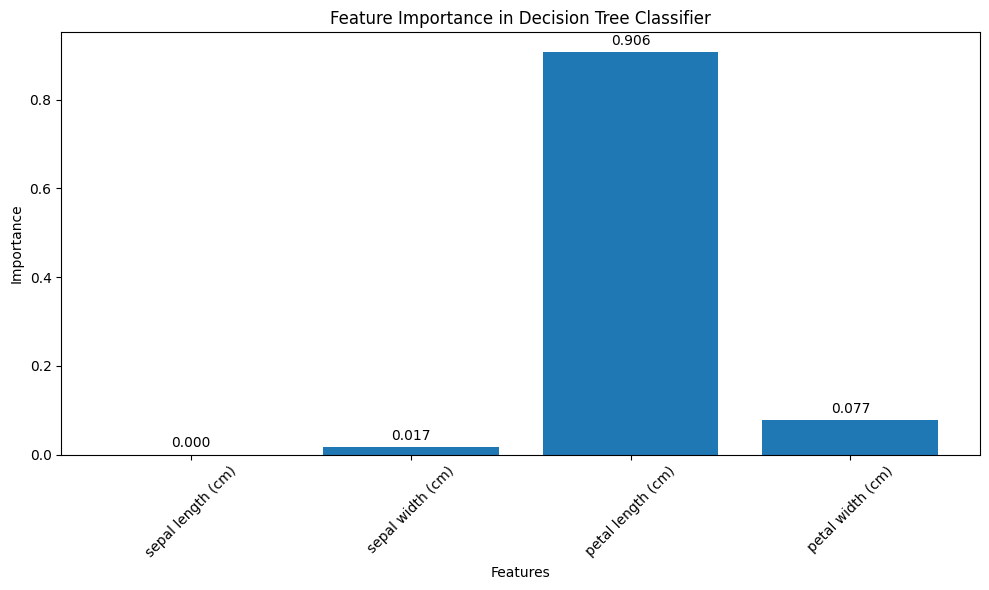

In [5]:
# I'm visualizing feature importance to make it easier to interpret
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(feature_importance)), feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Decision Tree Classifier')
plt.xticks(range(len(feature_names)), feature_names, rotation=45)

# I'm adding value labels on top of each bar for precise readings
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01,
             f'{feature_importance[i]:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

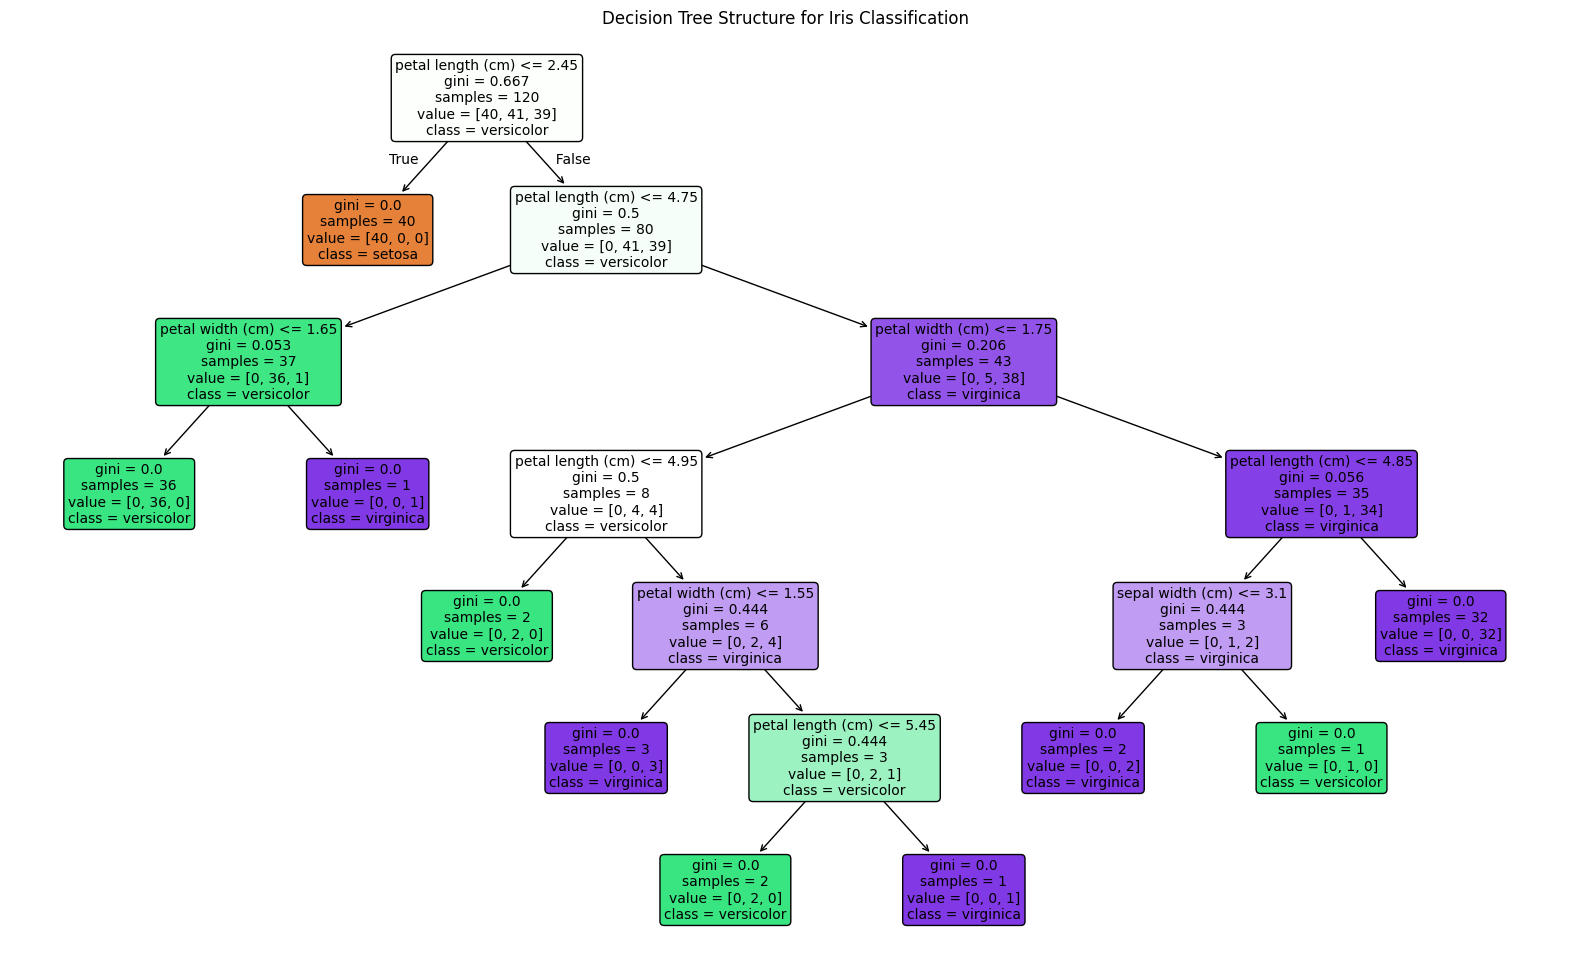

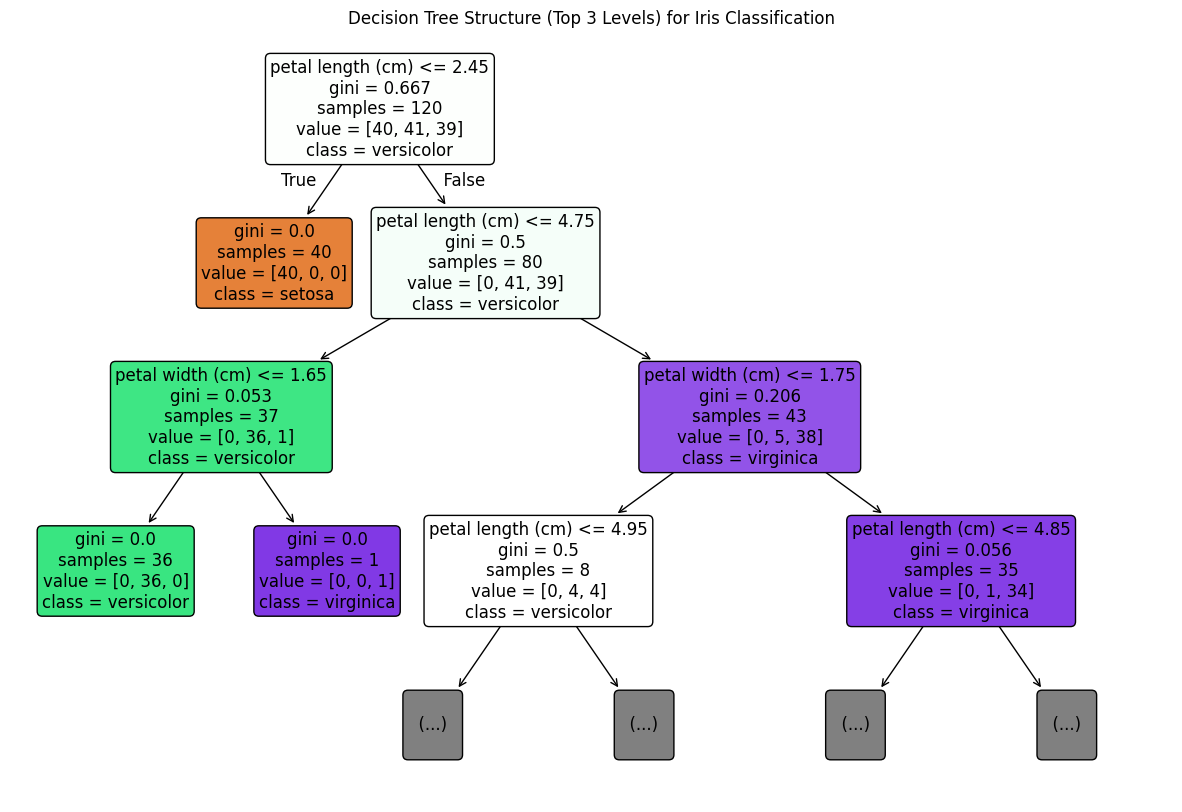

In [6]:
# Decision Tree Visualization
# I'm creating a visual representation of my decision tree to understand the decision process
plt.figure(figsize=(20, 12))
plot_tree(model, 
          feature_names=feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree Structure for Iris Classification')
plt.show()

# I'm also creating a more compact tree visualization focusing on the most important splits
plt.figure(figsize=(15, 10))
plot_tree(model, 
          feature_names=feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=12,
          max_depth=3)  # I'm limiting depth for better readability
plt.title('Decision Tree Structure (Top 3 Levels) for Iris Classification')
plt.show()